In [1]:
import cv2
import pandas as pd

from PIL import Image
from helpers import get_img, display_image
from image import get_data_from_image, get_str_from_image

In [2]:
path = 'test.png'

In [3]:
img = get_img(path, (1280, -1))

In [4]:
data = get_data_from_image(img=img)

In [5]:
df = pd.DataFrame(data)

In [6]:
df_filtered = df.drop(df[df['conf'] == '-1'].index)

In [7]:
df_filtered.reset_index(inplace=True)

In [8]:
img_ = img.copy()
for index, row in df_filtered.iterrows():
    l, t, w, h, conf, text = row['left':'text']
    if text.strip() == '':
        continue
    cv2.rectangle(img_,(l,t),(l+w,t+h),(0,0,0),-2)
    cv2.putText(img_, str(text), (l+4, t+7), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255,255,255), 1)

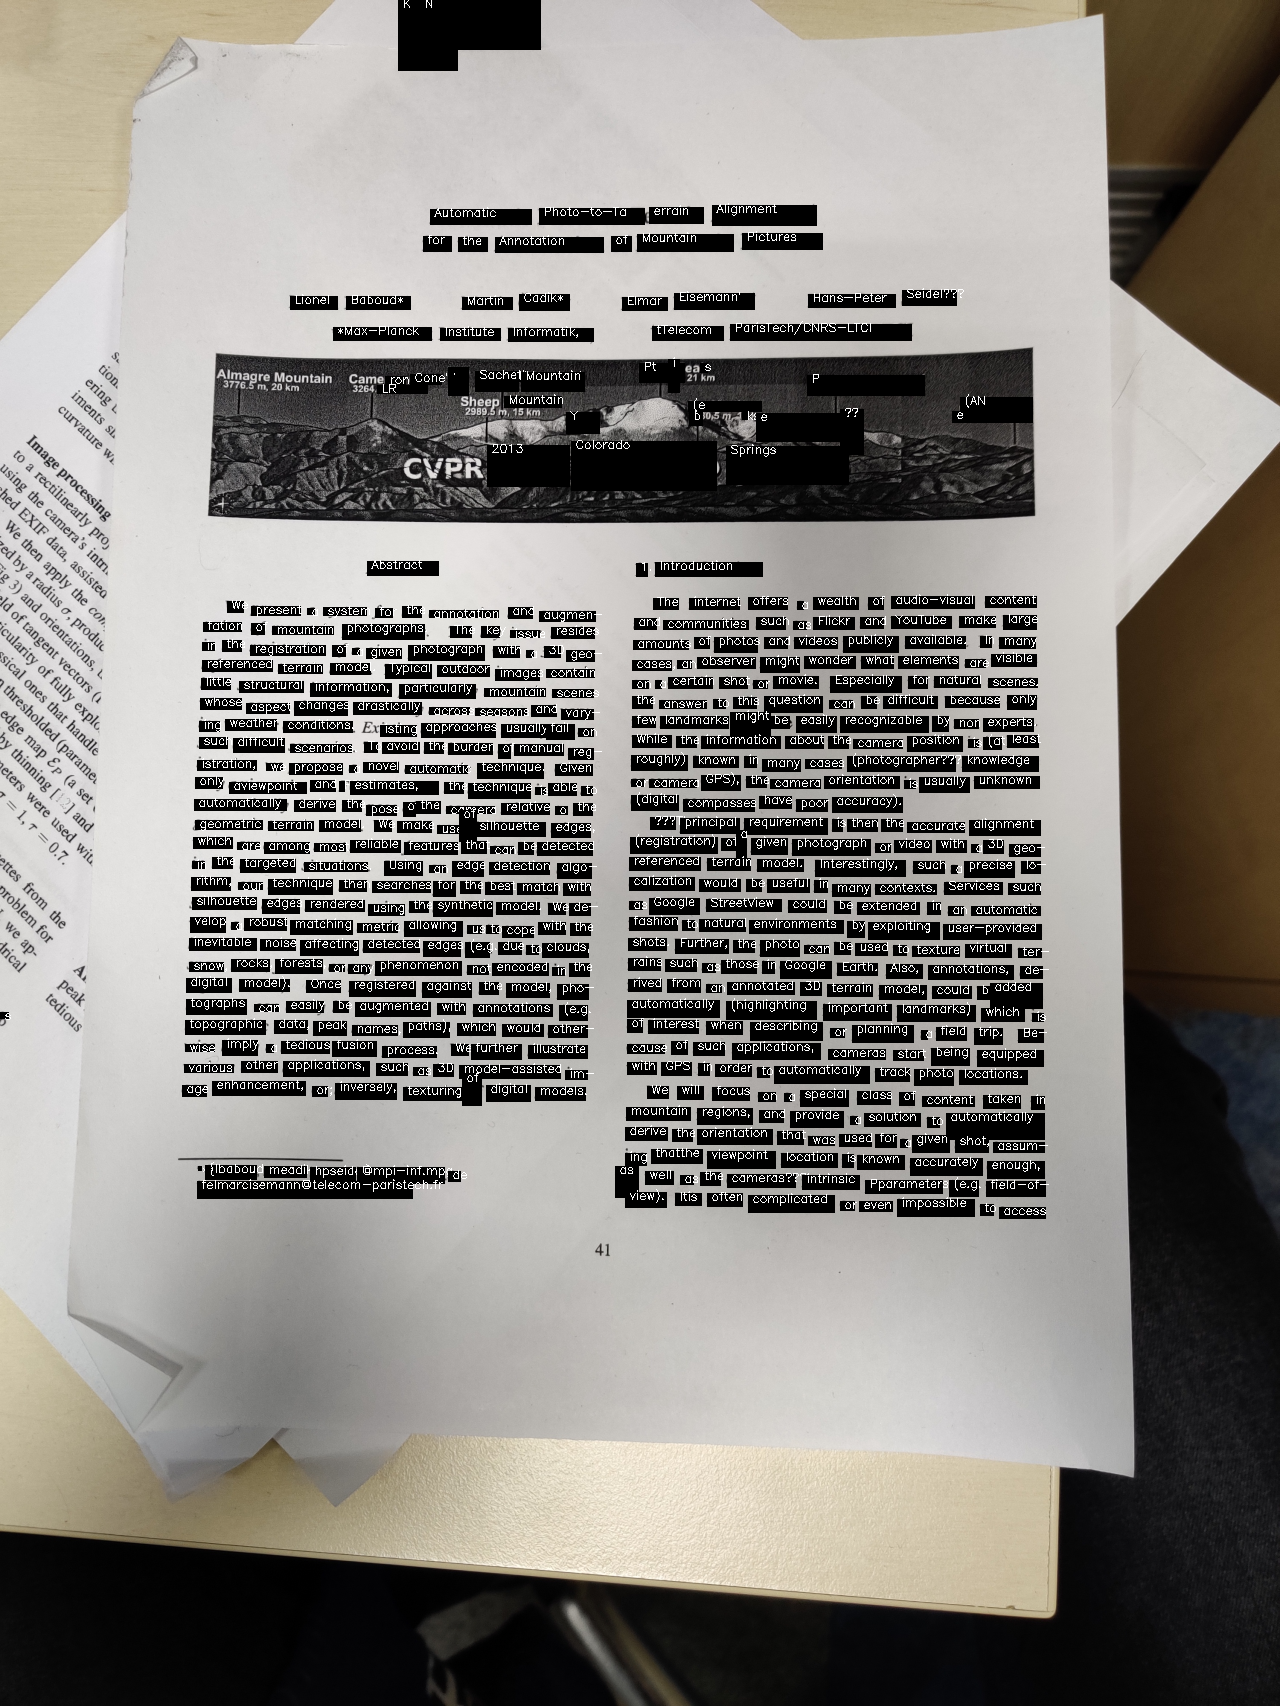

In [9]:
Image.fromarray(cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)) #.save('potato.png')